# Exploratory data analysis (EDA)



In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Read the files created from accident & weather preprocessing and the joined dataset

In [2]:
df_accidents = pd.read_pickle('datasets/accidents.pkl')
df_weather = pd.read_pickle('datasets/hourly_weather.pkl')
df_join = pd.read_csv('datasets/dataset.csv')

In [3]:
df_accidents.head()

,date,AccidentType,AccidentSeverityCategory,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,Year,Month,WeekDay,Hour
0,2011-01-01 00:30:00,at0,as4,0,0,0,rt433,2684605,1245194,2011,1,Saturday,0.0
1,2011-01-01 01:30:00,at0,as3,0,1,0,rt433,2682382,1246980,2011,1,Saturday,1.0
2,2011-01-01 02:30:00,at0,as4,0,0,0,rt439,2682791,1247749,2011,1,Saturday,2.0
3,2011-01-01 02:30:00,at5,as3,0,0,0,rt433,2681199,1247102,2011,1,Saturday,2.0
4,2011-01-01 03:30:00,at0,as4,0,0,0,rt433,2682479,1250690,2011,1,Saturday,3.0


In [4]:
df_weather.head()

,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,dew_point,global_radiation,humidity,water_level
0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,0.0,1.616667,0.5,95.833333,67.635
1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,0.0,1.520000,0.6,93.600000,81.162
2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,0.0,1.380000,0.0,92.000000,81.162
3,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,0.0,1.500000,0.0,92.800000,81.162
4,2011-01-01 04:30:00,2.500000,5.10,4.0,1.580000,1.580000,1108,1.62,973.16,0.0,0.720000,0.2,88.200000,81.162


In [5]:
df_join.head()

,Unnamed: 0,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,...,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
0,0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
3,3,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_weather.columns

Index(['date', 'air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level'],
      dtype='object')

In [7]:
df_join.describe()

,Unnamed: 0,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,precipitation,...,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
count,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,...,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000,92081.000000
mean,46040.000000,11.952481,13.594087,4.454852,1.925160,1.880456,894.793443,10.775051,969.616073,0.020578,...,0.047143,0.047513,0.049511,0.051042,0.047827,0.042484,0.038835,0.037695,0.037282,0.036989
std,26581.639406,8.157353,6.830242,3.010398,1.288405,1.235398,464.571093,8.764984,7.520129,0.117951,...,0.211946,0.212734,0.216933,0.220085,0.213402,0.201692,0.193203,0.190459,0.189454,0.188736
min,0.000000,-13.160000,2.560000,0.000000,0.000000,0.000000,0.000000,-22.440000,930.820000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23020.000000,5.420000,6.600000,2.400000,1.040000,1.040000,572.000000,3.900000,965.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46040.000000,11.660000,13.000000,3.700000,1.720000,1.720000,836.000000,10.560000,969.860000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69060.000000,17.980000,19.920000,5.800000,2.580000,2.480000,1312.000000,17.260000,974.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92080.000000,37.120000,27.920000,32.000000,14.280000,14.280000,1923.000000,37.360000,994.460000,6.400000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizations of accidents data

In [8]:
df_accidents['AccidentSeverityCategory'].value_counts().to_dict()

{'as4': 31867, 'as3': 8874, 'as2': 1918, 'as1': 67}

In [9]:
all_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingPedestrian']==1) & (df_accidents['AccidentInvolvingBicycle']==1) 
                            & (df_accidents['AccidentInvolvingMotorcycle']==1)])

bicycle_only_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingBicycle']==1)])
moto_only_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingMotorcycle']==1)])
ped_only_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingPedestrian']==1)])


moto_bicycle_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingMotorcycle']==1) 
                                    & (df_accidents['AccidentInvolvingBicycle']==1)])

moto_ped_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingMotorcycle']==1)
                                    & (df_accidents['AccidentInvolvingPedestrian']==1)])

ped_bicycle_ = len(df_accidents.loc[(df_accidents['AccidentInvolvingPedestrian']==1) 
                                    & (df_accidents['AccidentInvolvingBicycle']==1)])

**Distribution of accidents across hours:**

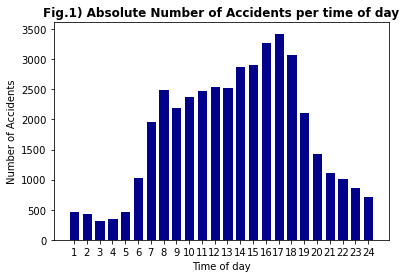

In [10]:
hourly_accs = df_accidents['Hour'].value_counts().to_dict()
hourly_accs[24.0] = hourly_accs.pop(0.0)
labels = [int(key) for key, value in hourly_accs.items()]

#create barplot of distribution
plt.title('Fig.1) Absolute Number of Accidents per time of day', fontweight = 'bold')
plt.bar(hourly_accs.keys(), hourly_accs.values(), color='darkblue', edgecolor='white', label='Mean', 
       tick_label = labels)
plt.ylabel('Number of Accidents')
plt.xlabel('Time of day')
plt.show()

**Average number of monthly accidents:**

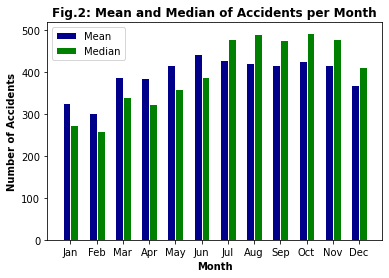

In [11]:
from itertools import groupby
import calendar

years = np.arange(2011,2020,1).tolist()
months = np.arange(1,13,1).tolist()


dict_1 = {}

for j in years:
    accidents_list = []
    
    for i in months:
        row_dim = df_accidents[(df_accidents['Year'] == j) & (df_accidents['Month'] == i)].shape[0]
        accidents_list.append(row_dim)
    dict_1['{}'.format(j)] = [i for i in accidents_list]


monthly_avgs_dict = {}

for j in range(12):
    
    month_list = []
    
    for key, value in dict_1.items():
        month_list.append(value[j]) #stores the number of accidents of the same month for every year
    months_name = calendar.month_name[j+1]
    monthly_avgs_dict[months_name[:3]] = [np.mean(month_list), np.median(month_list)] #stores the average number of accidents for each month


# set heights of bars
bars1 = [value[0] for key, value in monthly_avgs_dict.items()]
bars2 = [value[1] for key, value in monthly_avgs_dict.items()]
 
barWidth = 0.3

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, width=barWidth, color='darkblue', edgecolor='white', label='Mean')
plt.bar(r2, bars2, width=barWidth, color='green', edgecolor='white', label='Median')

plt.title('Fig.2: Mean and Median of Accidents per Month', fontweight = 'bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Number of Accidents', fontweight='bold')
plt.xticks([r + (barWidth-0.15) for r in range(len(bars1))], list(monthly_avgs_dict.keys()))


# Create legend & Show graphic
plt.legend()
plt.show()

**Average number of yearly accidents:**

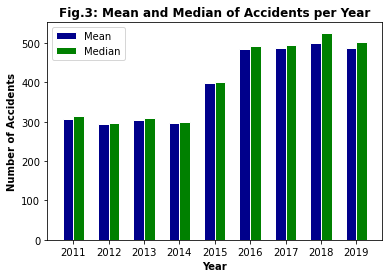

In [12]:
yearly_avgs_dict = {}

for key, value in dict_1.items():
    yearly_avgs_dict[key] = [np.mean(value), np.median(value)] #stores the average number of accidents per year
    

# set heights of bars
bars1 = [value[0] for key, value in yearly_avgs_dict.items()]
bars2 = [value[1] for key, value in yearly_avgs_dict.items()]
 
barWidth = 0.3

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, width=barWidth, color='darkblue', edgecolor='white', label='Mean')
plt.bar(r2, bars2, width=barWidth, color='green', edgecolor='white', label='Median')

plt.title('Fig.3: Mean and Median of Accidents per Year', fontweight = 'bold')
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Accidents', fontweight='bold')
plt.xticks([r + (barWidth-0.15) for r in range(len(bars1))], list(yearly_avgs_dict.keys()))


# Create legend & Show graphic
plt.legend()
plt.show()

**Number of accidents per location:**

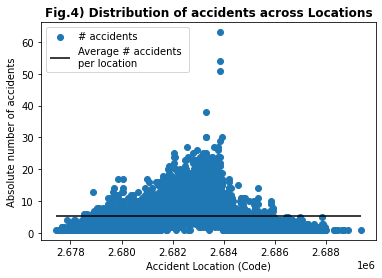

In [13]:
location_dict = df_accidents['AccidentLocation_CHLV95_E'].value_counts().to_dict()
plt.title('Fig.4) Distribution of accidents across Locations', fontweight = 'bold')
plt.scatter(location_dict.keys(), location_dict.values(), label = '# accidents')
plt.ylabel('Absolute number of accidents')
plt.xlabel('Accident Location (Code)')
plt.hlines(np.mean(list(location_dict.values())), min(list(location_dict.keys())), 
           max(list(location_dict.keys())), color = 'black', label = 'Average # accidents \nper location')
plt.legend(loc = 'upper left')

### Visualizations of weather data

In [14]:
df_weather.columns

Index(['date', 'air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level'],
      dtype='object')

**Average temperature per month:**

In [16]:
df_weather['year'] = pd.DatetimeIndex(df_weather['date']).year
df_weather['month'] = pd.DatetimeIndex(df_weather['date']).month

from itertools import groupby
import calendar

years = np.arange(2011,2020,1).tolist()
months = np.arange(1,13,1).tolist()


dict_2 = {}

for j in years:
    temperature_list = []
    
    for i in months:
        row_dim = df_weather[(df_weather['year'] == j) & (df_weather['month'] == i)].shape[0]
        temperature_list.append(row_dim)
    dict_1['{}'.format(j)] = [i for i in temperature_list]

**Average precipitation per month:**

**Target Distribution**

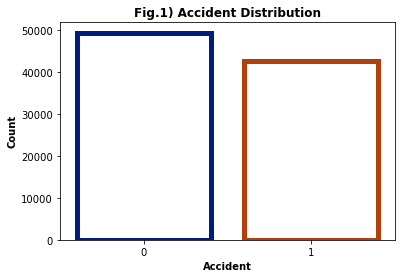

In [17]:
plt.title('Fig.1) Accident Distribution', fontweight = 'bold')
sns.countplot(x = 'Accident', data=df_join, facecolor=(0, 0, 0, 0),
                   linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('Accident', fontweight = 'bold')
plt.show()

**Boxplots for weather data w.r.t accident or not:**

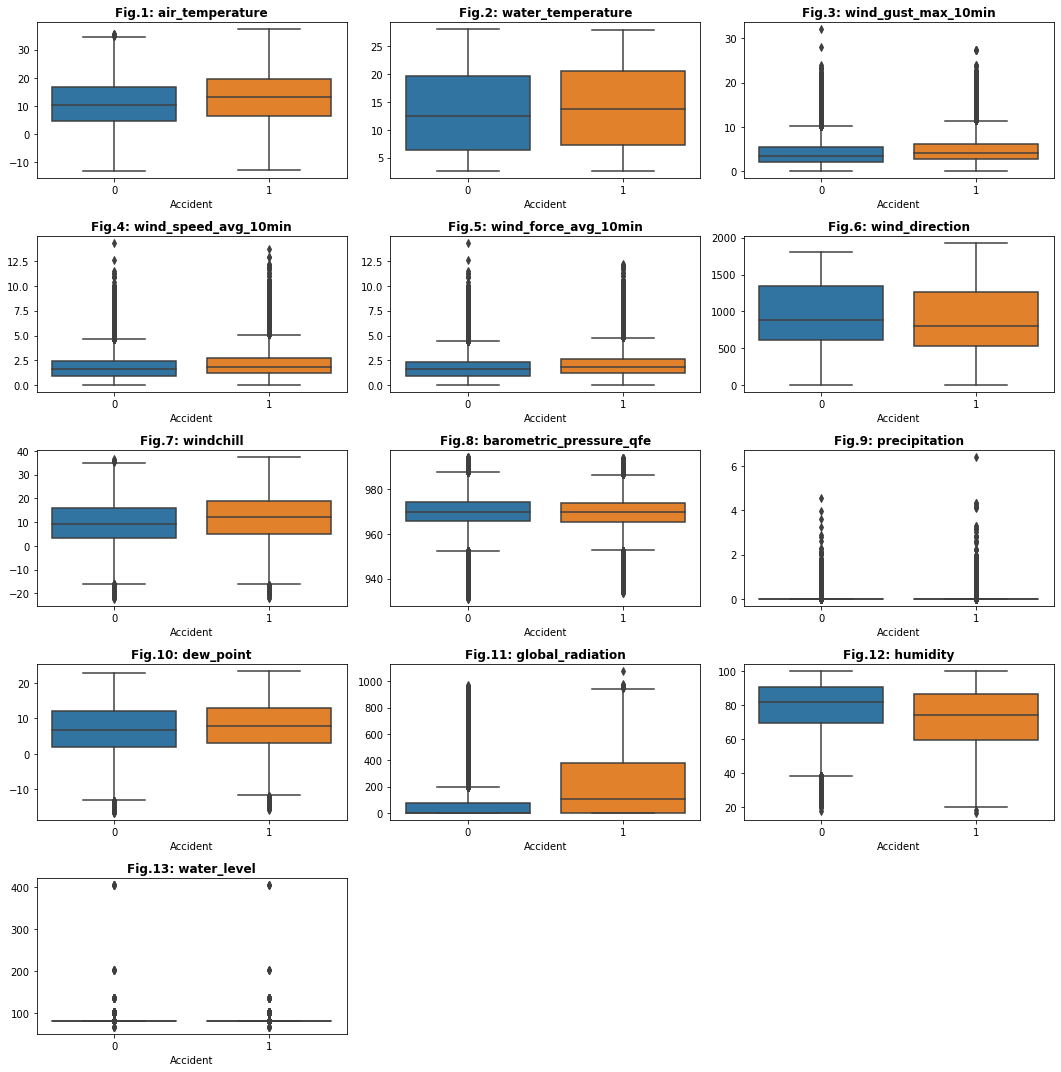

In [18]:
cols_list = ['air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level']

plt.figure(figsize=(15, 15))

for i in range(1,len(cols_list)+1):
    plt.subplot(5, 3, i)
    sns.boxplot(y = cols_list[i-1], x = 'Accident', data = df_join)
    plt.tight_layout()
    plt.title('Fig.{}: %s'.format(i) %cols_list[i-1], fontweight = 'bold')
    plt.ylabel('')
plt.show()